In [1]:
import pandas as pd
import numpy as np
import string
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
df = pd.read_csv('data/data.csv', encoding='latin-1')

In [3]:
print(len(df))

1653


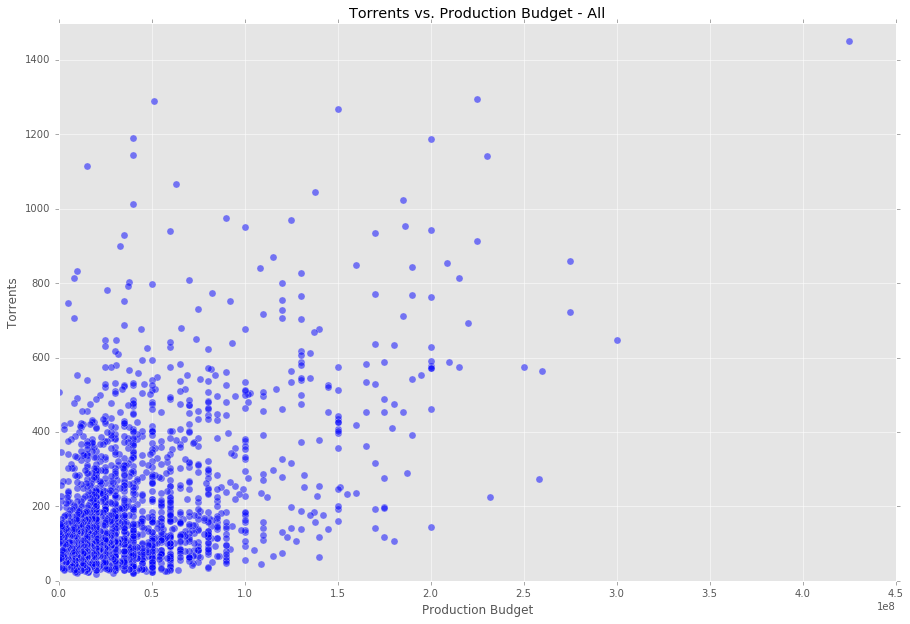

In [4]:
plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - All')
plt.scatter(df['Prod_Budget'], df['Total_Torrents'], alpha=0.5, s=50)

In [5]:
# unique list of grouped genres as a string
unq_genres = df['Genre'].unique()
unq_genres = unq_genres.tolist()

# unique list of grouped genres as a list of genres
lst_grp_genres = []
for lst in unq_genres:
    temp = []
    for genre in lst.split(','):
         temp.append(genre)
    lst_grp_genres.append(temp)
    
#print(len(lst_grp_genres))
#print(lst_grp_genres[:10])
print(len(unq_genres))
print(unq_genres[:10])

242
['Action, Adventure, Fantasy', 'Action, Adventure, Thriller', 'Action, Adventure, Drama', 'Action, Adventure, Sci-Fi', 'Animation, Adventure, Comedy', 'Action, Adventure', 'Adventure, Family, Fantasy', 'Action, Adventure, Comedy', 'Action, Sci-Fi', 'Drama, Romance']


In [6]:
# unique list of individual genres
ind_genre = set()

for lst in unq_genres:
    for genre in lst.split(','):
        ind_genre.add(genre.strip())
ind_genre = sorted(ind_genre)

print(len(ind_genre))
print(ind_genre)

20
['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


In [7]:
# dictionary - count of genre occurences
count = defaultdict(lambda:0)

for genre in ind_genre:
    count[genre] = df.Genre.str.contains(genre).sum()

import operator
srt = sorted(count.items(), key=operator.itemgetter(1))
srt = srt[::-1]
print(srt)

[('Drama', 677), ('Comedy', 620), ('Action', 547), ('Adventure', 359), ('Crime', 355), ('Thriller', 336), ('Romance', 258), ('Horror', 207), ('Mystery', 171), ('Sci-Fi', 171), ('Fantasy', 157), ('Family', 127), ('Biography', 70), ('Animation', 64), ('Sport', 57), ('Music', 51), ('History', 34), ('War', 25), ('Western', 16), ('Musical', 11)]


In [8]:
def split_to_array(ser):
    split_array = np.array(ser.strip().replace(',','').split(' '))
    return pd.Series(split_array)

genres = df.Genre.apply(split_to_array)
genres = pd.Series(genres.values.ravel()).dropna()
genres = genres.value_counts().sort_values(ascending=False)

In [9]:
def convert_frequency(ser, genres=genres):
    split_array = np.array(ser.strip().replace(',','').split(' '))
    genre = genres.loc[split_array].argmax()
    return genre

df['Genre_Single'] = df.Genre.apply(convert_frequency)

In [10]:
df_test=df[['Genre','Genre_Single']]
print(df_test.head(20))

                           Genre Genre_Single
0     Action, Adventure, Fantasy       Action
1    Action, Adventure, Thriller       Action
2       Action, Adventure, Drama        Drama
3      Action, Adventure, Sci-Fi       Action
4   Animation, Adventure, Comedy       Comedy
5              Action, Adventure       Action
6     Adventure, Family, Fantasy    Adventure
7      Action, Adventure, Sci-Fi       Action
8              Action, Adventure       Action
9      Action, Adventure, Sci-Fi       Action
10    Action, Adventure, Fantasy       Action
11    Action, Adventure, Fantasy       Action
12     Action, Adventure, Sci-Fi       Action
13     Action, Adventure, Comedy       Comedy
14      Action, Adventure, Drama        Drama
15     Action, Adventure, Sci-Fi       Action
16    Adventure, Family, Fantasy    Adventure
17    Action, Adventure, Fantasy       Action
18     Action, Adventure, Sci-Fi       Action
19  Animation, Adventure, Comedy       Comedy


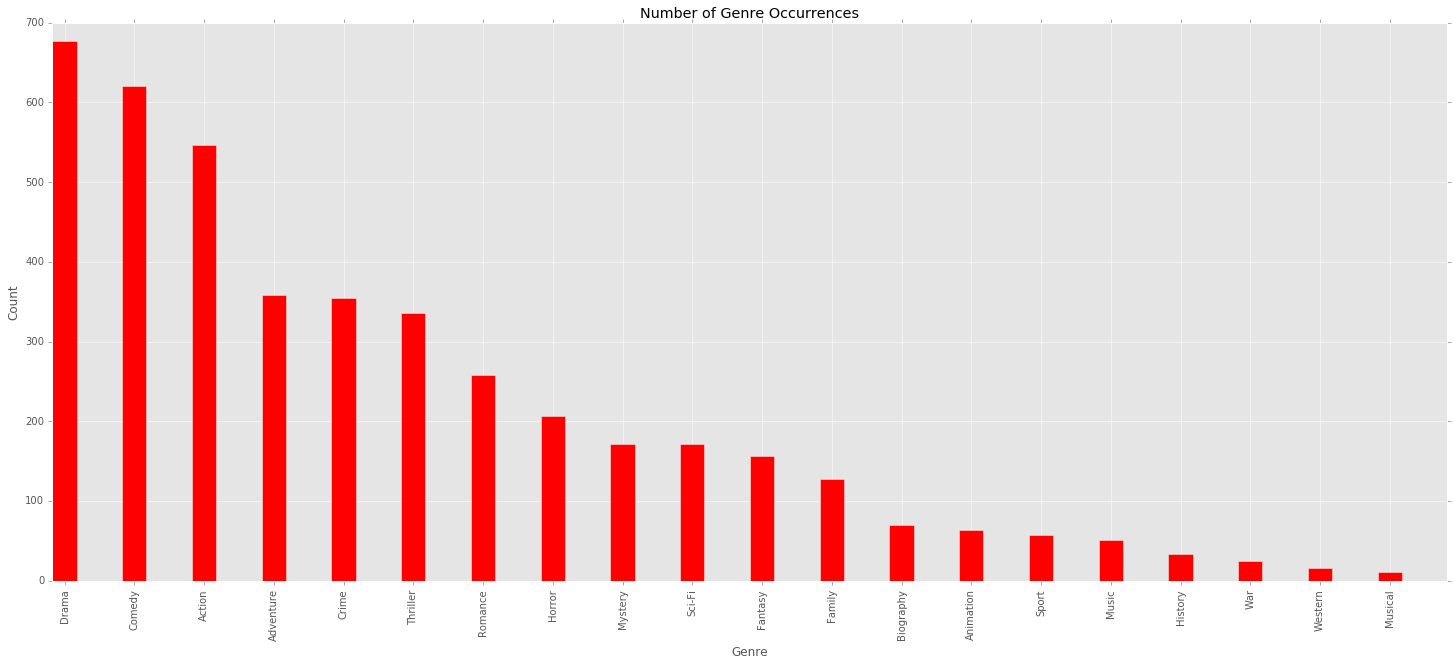

In [11]:
plt.figure(figsize=(25,10))

ind = np.arange(len(count)) # the x locations for the groups
width = 0.35 # the width of the bars

bar_genre = [genre for genre, count in srt]
bar_count = [count for genre, count in srt]

plt.bar(ind, bar_count, width, color='r')

plt.ylabel('Count')
plt.xlabel('Genre')
plt.title('Number of Genre Occurrences')
plt.xticks(ind + width/2., (bar_genre), rotation='vertical')
plt.yticks(np.arange(0, 701, 100))

plt.show()

In [12]:
# return tuple of (string, list)
tup_lst = []
for genre_gp in unq_genres:
    temp = []
    for genre in genre_gp.split():
        temp.append(genre)
    tup_lst.append((genre_gp, temp))

In [13]:
def srch_lst(term, t_lst):
    srch = []
    for st, lst in t_lst:
        if term in st:
            srch.append(st)
    return srch
#print(srch_lst('Comedy', tup_lst))

677


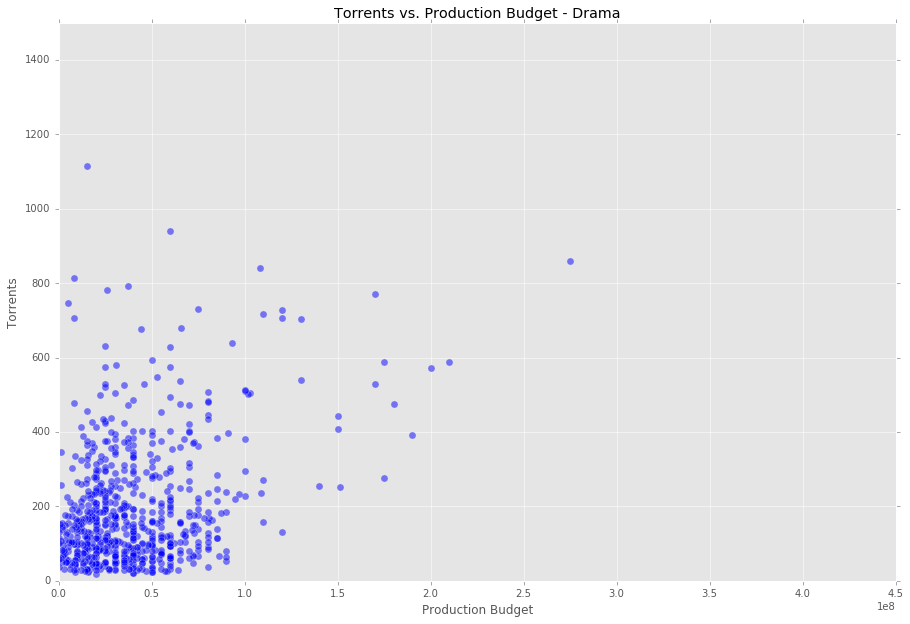

In [14]:
term = 'Drama'
df_a = df.loc[df['Genre'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

620


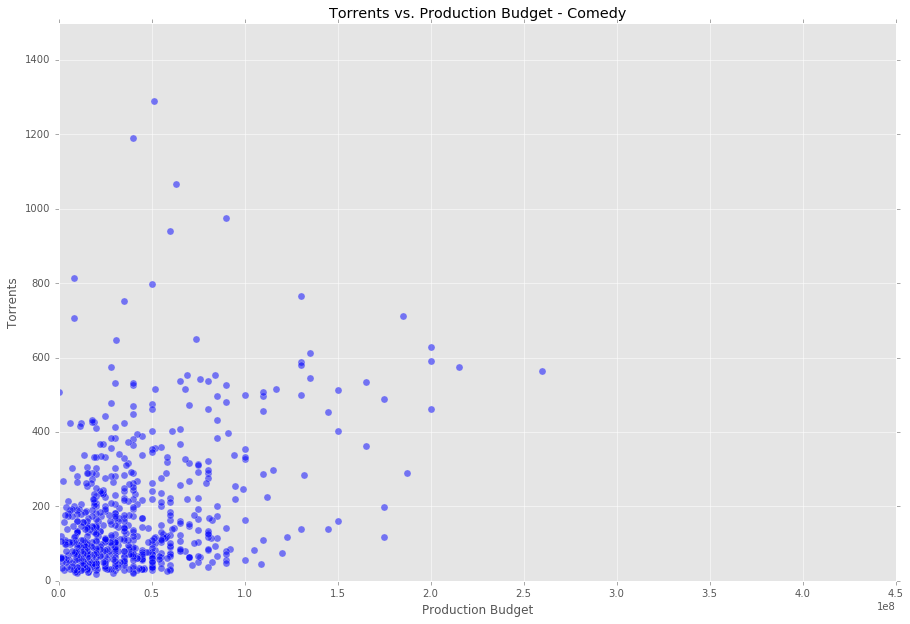

In [15]:
term = 'Comedy'
df_a = df.loc[df['Genre'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

547


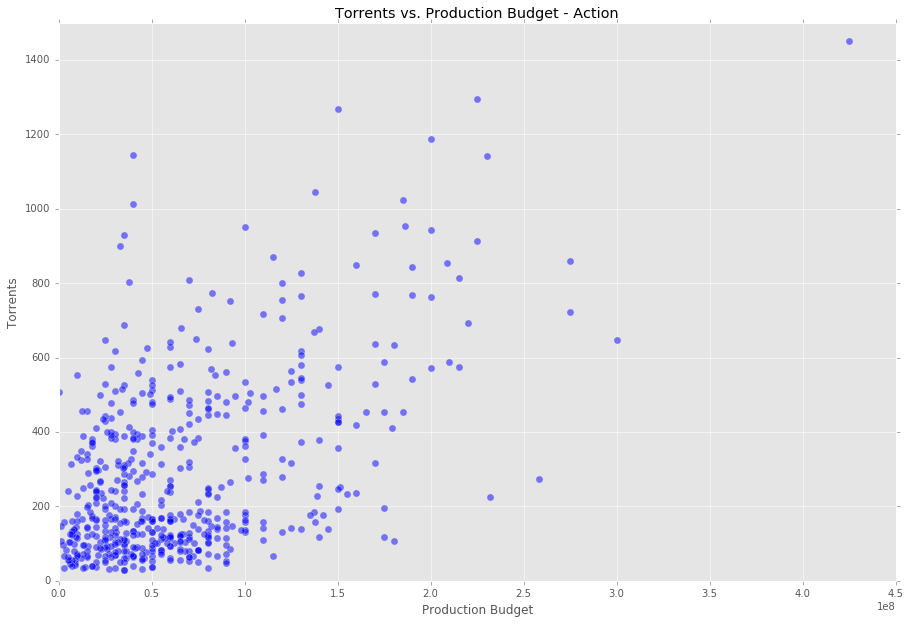

In [16]:
term = 'Action'
df_a = df.loc[df['Genre'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

In [17]:
df_sub = df[['Prod_Budget', 'Genre_Single', 'Total_Torrents']]
df_sub.describe()

,Prod_Budget,Total_Torrents
count,1.653000e+03,1653.000000
mean,4.766387e+07,223.719903
std,4.434656e+07,196.768665
min,6.800000e+04,17.000000
25%,1.800000e+07,89.000000
50%,3.500000e+07,158.000000
75%,6.000000e+07,299.000000
max,4.250000e+08,1450.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10dacd160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10dd72550>]], dtype=object)

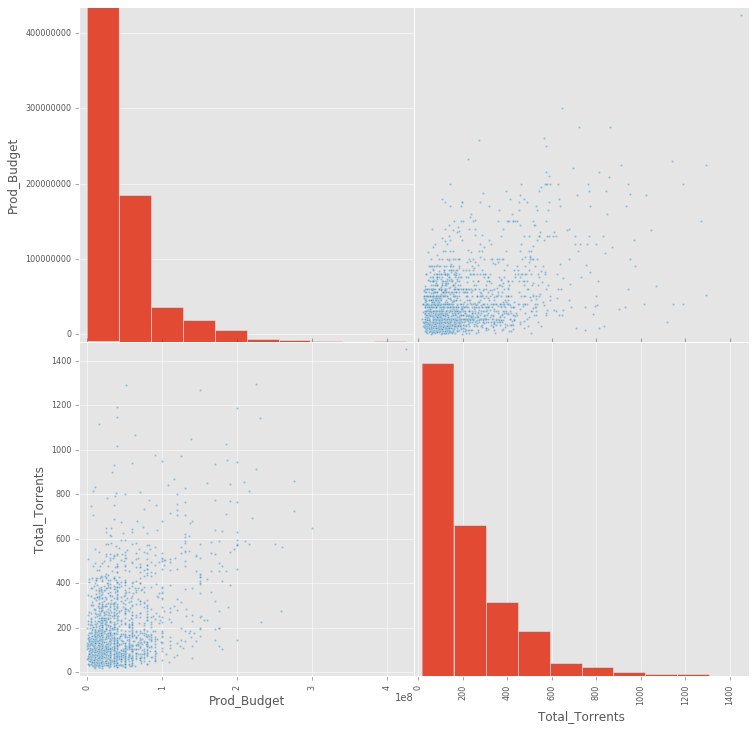

In [18]:
# Lets take a look at our entire model
plt.rcParams['figure.figsize'] = (12, 12)
pd.tools.plotting.scatter_matrix(df_sub)

In [19]:
# select only genres of significance
genre = ['Action', 'Adventure', 'Comedy', 'Crime', 'Drama']
df_sub = df_sub.loc[df_sub['Genre_Single'].isin(genre)]

In [20]:
from patsy import dmatrices

y, x = dmatrices('Total_Torrents ~ Prod_Budget + Genre_Single', data=df_sub, return_type='dataframe')

In [21]:
y.head()

,Total_Torrents
0,1450.0
1,647.0
2,861.0
3,723.0
4,563.0


In [37]:
df.shape

(1653, 13)

In [38]:
df.head()

,Title,Released,Prod_Budget,Rated,Runtime,Genre,Director,Actors,Pirate_Count,Torrentz_Count,Zoogle_Ver_Count,Total_Torrents,Genre_Single
0,Avatar,2009-12-18,425000000.0,PG-13,162,"Action, Adventure, Fantasy",James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",371.0,961.0,118.0,1450.0,Action
1,Spectre,2015-11-06,300000000.0,PG-13,148,"Action, Adventure, Thriller",Sam Mendes,"Daniel Craig, Christoph Waltz, LÃ©a Seydoux, R...",96.0,392.0,159.0,647.0,Action
2,The Dark Knight Rises,2012-07-20,275000000.0,PG-13,164,"Action, Adventure, Drama",Christopher Nolan,"Christian Bale, Gary Oldman, Tom Hardy, Joseph...",215.0,623.0,23.0,861.0,Drama
3,John Carter,2012-03-09,275000000.0,PG-13,132,"Action, Adventure, Sci-Fi",Andrew Stanton,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",166.0,498.0,59.0,723.0,Action
4,Tangled,2010-11-24,260000000.0,PG,100,"Animation, Adventure, Comedy","Nathan Greno, Byron Howard","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",170.0,361.0,32.0,563.0,Comedy


In [22]:
x.head()

,Intercept,Genre_Single[T.Adventure],Genre_Single[T.Comedy],Genre_Single[T.Crime],Genre_Single[T.Drama],Prod_Budget
0,1.0,0.0,0.0,0.0,0.0,425000000.0
1,1.0,0.0,0.0,0.0,0.0,300000000.0
2,1.0,0.0,0.0,0.0,1.0,275000000.0
3,1.0,0.0,0.0,0.0,0.0,275000000.0
4,1.0,0.0,1.0,0.0,0.0,260000000.0


In [23]:
import statsmodels.api as sm

model = sm.OLS(y, x)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Total_Torrents   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     103.9
Date:                Thu, 14 Jul 2016   Prob (F-statistic):           2.35e-94
Time:                        14:37:12   Log-Likelihood:                -9938.8
No. Observations:                1512   AIC:                         1.989e+04
Df Residuals:                    1506   BIC:                         1.992e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                   184.1709     12.841     14.342      0.000       158.983   209.359
Genre_Single[T.Adventure]  -119.9879     29.606     -4.053      0.000      -178.061   -61.915
Genre_Single[T.Comedy]      -76.9676     13.239     -5.814      0.000      -102.936   -50.999
Genre_Single[T.Crime]       -96.0255     35.048     -2.740      0.006      -164.773   -27.277
Genre_Single[T.Drama]       -69.1584     12.649     -5.468      0.000       -93.970   -44.347
Prod_Budget                1.999e-06   1.05e-07     19.028      0.000      1.79e-06   2.2e-06
==============================================================================
Omnibus:                      494.795   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1871.779
Skew:                           1.561   Prob(JB):                         0.00
Kurtosis:                       7.468   Cond. No.                     5.49e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.49e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
import statsmodels.formula.api as smf

results = smf.ols(formula='Total_Torrents ~ Prod_Budget + Genre_Single', data=df_sub,).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Total_Torrents   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     103.9
Date:                Thu, 14 Jul 2016   Prob (F-statistic):           2.35e-94
Time:                        14:37:12   Log-Likelihood:                -9938.8
No. Observations:                1512   AIC:                         1.989e+04
Df Residuals:                    1506   BIC:                         1.992e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                   184.1709     12.841     14.342      0.000       158.983   209.359
Genre_Single[T.Adventure]  -119.9879     29.606     -4.053      0.000      -178.061   -61.915
Genre_Single[T.Comedy]      -76.9676     13.239     -5.814      0.000      -102.936   -50.999
Genre_Single[T.Crime]       -96.0255     35.048     -2.740      0.006      -164.773   -27.277
Genre_Single[T.Drama]       -69.1584     12.649     -5.468      0.000       -93.970   -44.347
Prod_Budget                1.999e-06   1.05e-07     19.028      0.000      1.79e-06   2.2e-06
==============================================================================
Omnibus:                      494.795   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1871.779
Skew:                           1.561   Prob(JB):                         0.00
Kurtosis:                       7.468   Cond. No.                     5.49e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.49e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
model.score(x, y)

0.25652606747859996

In [27]:
model.coef_

array([[  0.00000000e+00,  -1.19987948e+02,  -7.69675633e+01,
         -9.60254626e+01,  -6.91583784e+01,   1.99851098e-06]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1111e9c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1112b8fd0>]], dtype=object)

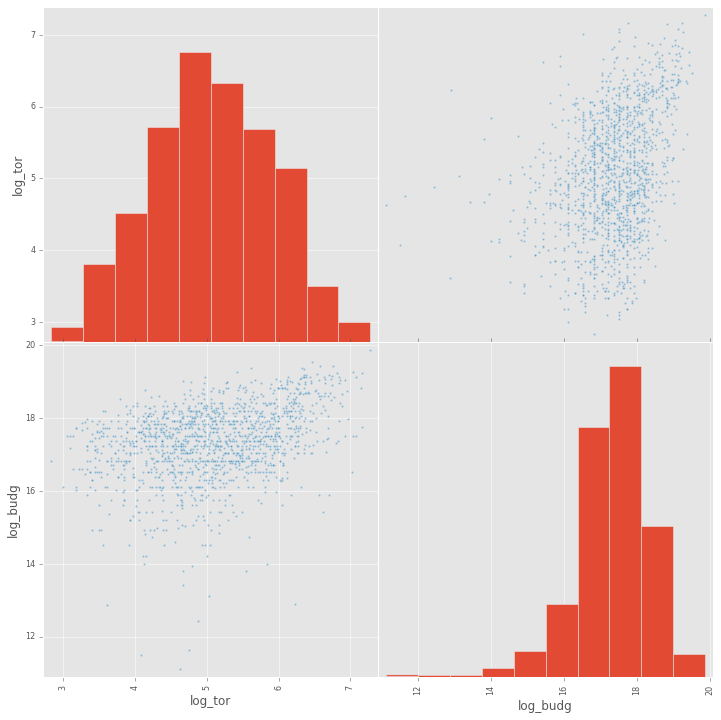

In [28]:
df_sub['log_tor']=np.log(df_sub.Total_Torrents)
df_sub['log_budg']=np.log(df_sub.Prod_Budget)

trans=df_sub[['log_tor','log_budg']]
pd.tools.plotting.scatter_matrix(trans)

---
# Log Transform

In [29]:
y, x = dmatrices('log_tor ~ log_budg + Genre_Single', data=df_sub, return_type='dataframe')
x.head()

,Intercept,Genre_Single[T.Adventure],Genre_Single[T.Comedy],Genre_Single[T.Crime],Genre_Single[T.Drama],log_budg
0,1.0,0.0,0.0,0.0,0.0,19.867600
1,1.0,0.0,0.0,0.0,0.0,19.519293
2,1.0,0.0,0.0,0.0,1.0,19.432282
3,1.0,0.0,0.0,0.0,0.0,19.432282
4,1.0,0.0,1.0,0.0,0.0,19.376192


In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

model.score(x,y)

0.14924347217589673

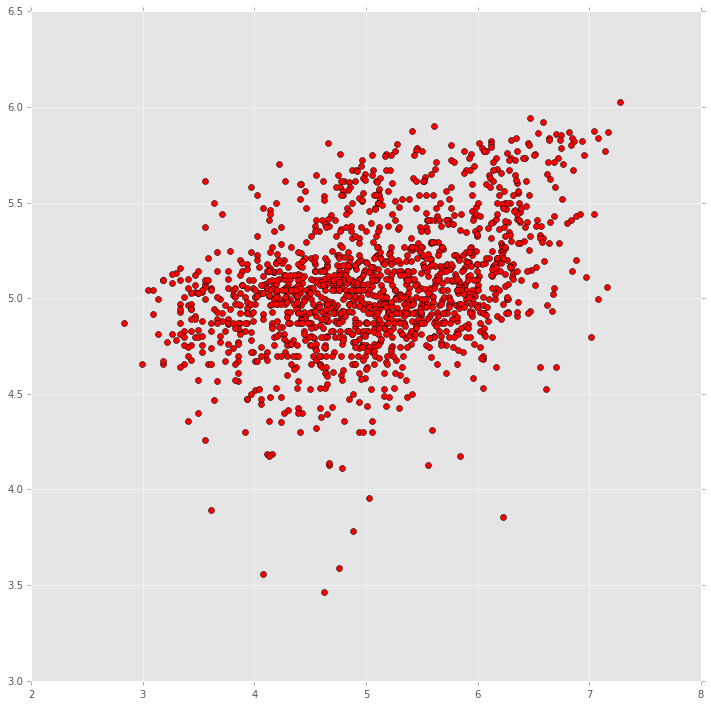

In [31]:
_ = plt.plot(y, model.predict(x), 'ro')

In [32]:
from sklearn import cross_validation as cv
from sklearn import metrics

x_train, x_test, y_train, y_test = cv.train_test_split(x,y,test_size=0.333,random_state=1234)

model = LinearRegression().fit(x_train, y_train)

In [33]:
metrics.mean_squared_error(y_train,model.predict(x_train))

0.6136541841180968

In [34]:
model.score(x_train, y_train)

0.15137370462692779

In [35]:
metrics.mean_squared_error(y_test,model.predict(x_test))

0.621914743840141

In [36]:
# reset x, y otherwise errors occur
y, x = dmatrices('log_tor ~ log_budg + Genre_Single', data=df_sub, return_type='dataframe')

from sklearn.cross_validation import KFold
kf = KFold(len(df_sub), n_folds=100, shuffle=True)

for train_index, test_index in kf:
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf2 = LinearRegression().fit(x.iloc[train_index], y.iloc[train_index])

clf2.score(x,y)

0.14920668865691411